In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
import joblib

## Traitement des données et premières analyses

In [85]:
billets = pd.read_csv("billets.csv",sep=";")
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [86]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [87]:
billets["is_genuine"].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

In [88]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [89]:
billets_manquants = billets[billets.isnull().any(axis=1)]
billets_manquants

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


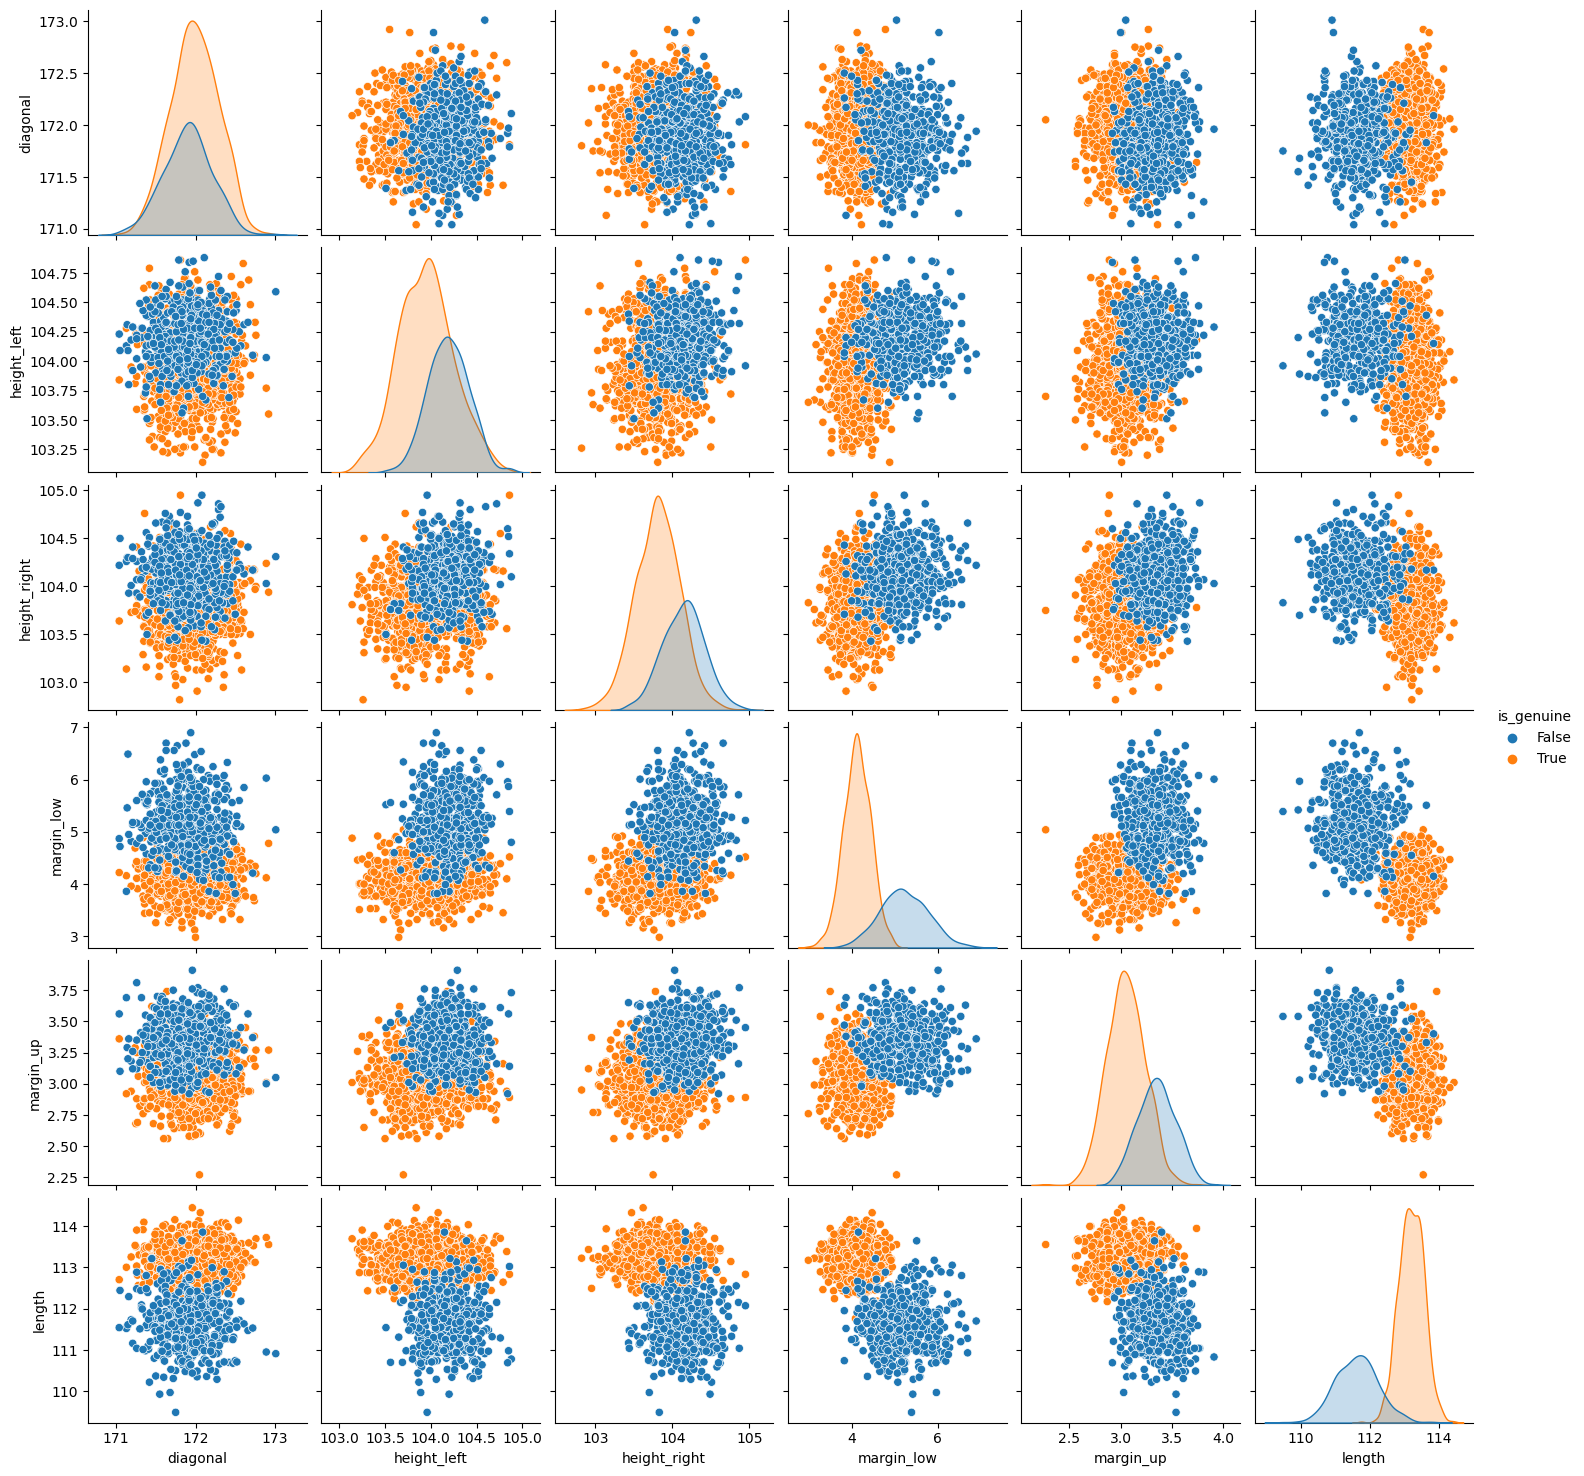

In [90]:
sns.pairplot(billets, hue='is_genuine')
plt.show()

In [91]:
matrice_correlation = billets.corr()
matrice_correlation

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


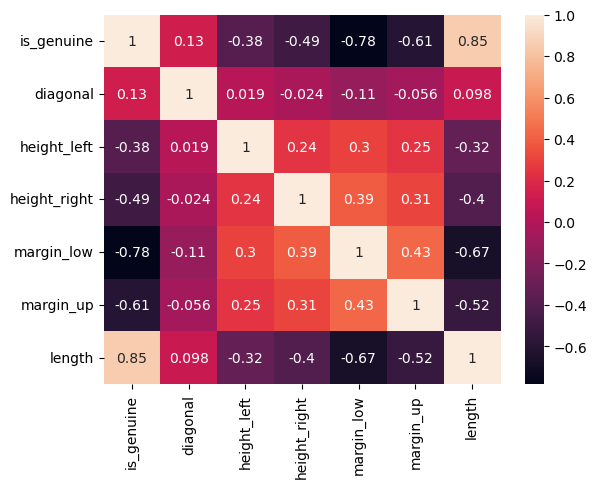

In [92]:
sns.heatmap(billets.corr(),annot=True)
plt.show()

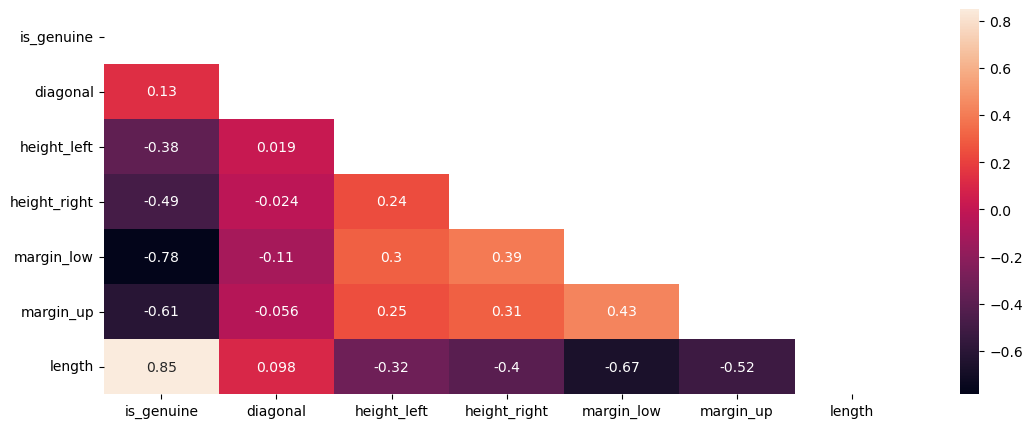

In [93]:
matrice_triangulation = billets.corr()
mask = np.triu(np.ones_like(matrice_triangulation, dtype=np.bool_))
plt.figure(figsize=(13, 5))
sns.heatmap(matrice_triangulation, mask=mask, annot=True)
plt.show()

## Mise en place de la régression linéaire

In [94]:
billets_complets = billets.dropna(0)
billets_complets

C:\Users\jeffs\AppData\Local\Temp\ipykernel_15012\2342164872.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  billets_complets = billets.dropna(0)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [95]:
Y = billets_complets["margin_low"]
Y

0       4.52
1       3.77
2       4.40
3       3.62
4       4.04
        ... 
1495    4.42
1496    5.27
1497    5.51
1498    5.17
1499    4.63
Name: margin_low, Length: 1463, dtype: float64

In [96]:
X = billets_complets.drop(columns=["margin_low","is_genuine"])
X

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54
...,...,...,...,...,...
1495,171.75,104.38,104.17,3.09,111.28
1496,172.19,104.63,104.44,3.37,110.97
1497,171.80,104.01,104.12,3.36,111.95
1498,172.06,104.28,104.06,3.46,112.25


In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=69)

In [98]:
lr = LinearRegression()

In [99]:
lr.fit(X_train, Y_train)

LinearRegression()

In [100]:
lr.score(X_test,Y_test)

0.4840389131859246

In [101]:
valeurs_predites_lr = lr.predict(X)
valeurs_predites_lr

array([4.79456924, 4.16426259, 4.08249686, ..., 4.89363165, 4.79412437,
       4.85380684])

## Evaluation régression linéaire

In [102]:
Y_pred = lr.predict(X_test)
r2 = lr.score(X_train, Y_train)
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = metrics.mean_squared_error(Y_test, Y_pred, squared=False)
mae = metrics.mean_absolute_error(Y_test, Y_pred)
lr_metrics = [r2, mse, rmse, mae]
lr_metrics

[0.47221943527073473,
 0.2312017089430684,
 0.4808343882700866,
 0.3794326531173843]

In [103]:
n = len(Y_test)
k = len(X_test.columns)
ajusted_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))
ajusted_r2

0.4666871442358368

In [104]:
residus = Y_test - Y_pred
residus

820     0.425827
1305    0.027310
0      -0.274569
100    -0.151118
736    -0.537727
          ...   
1321    0.707279
518    -1.130700
1058   -0.285292
1139    0.740533
778     0.150793
Name: margin_low, Length: 483, dtype: float64

5 hypothèses à vérifier :
- linéarité du modèle
- indépendance des résidus
- variance constante des résidus
- normalité de la distribution des résidus
- pas de colinéarité entre les variables explicatives

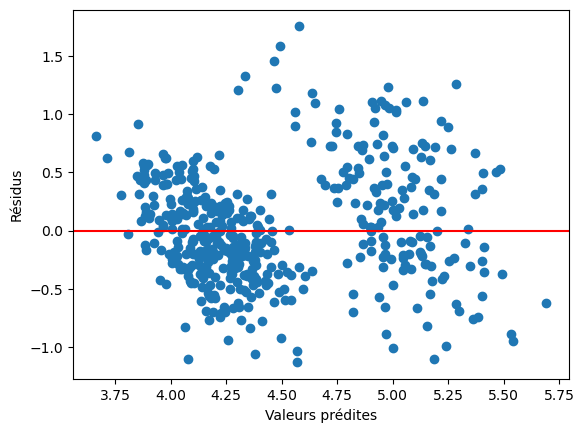

In [105]:
fig, ax = plt.subplots()
ax.scatter(x=Y_pred, y=residus)
ax.axhline(y=0,color='r')
ax.set_xlabel('Valeurs prédites')
ax.set_ylabel('Résidus')
plt.show()

Vérification de la linéarité du modèle
- Hypothèse H0 : il n'y a pas d'autocorrélation entre les résidus
- Hypothèse H1 : il y a une autocorrélation entre les résidus

Le test de Durbin-Watson nous fournit un score compris entre 0 et 4 permettant d'évaluer une autocorrélation positive (si le score dépasse une certaine valeur) ou négative des données.

In [106]:
test_durbin_watson = durbin_watson(residus)
test_durbin_watson

2.0792026176919576

Avec un score proche de 2, nous pouvons rejeter l'hypothèse H1 et conclure qu'il n'y a pas d'autocorrélation entre les résidus.

Le test de Breusch-Pagan nous permet de tester l'homoscédasticité de notre modèle de régression linéaire (c'est-à-dire la stabilité de la distribution des résidus.
- Hypothèse H0 : il y a homoscédasticté des résidus
- Hypothèse H1 : il y a hétéroscédasticité des résidus

In [107]:
test_breusch_pagan = het_breuschpagan(residus, X_test.assign(constant=1))
test_breusch_pagan

(31.293714524265773,
 8.19586895597665e-06,
 6.609207048050547,
 5.80363415332683e-06)

Avec des p_values inférieures à 0,05, nous pouvons rejeter les hypothèses H0 et conclure qu'il y a une hétéroscédascité des résidus.

Le test de Shapiro-Wilk nous permet si les résidus observés suivent une loi de distribution normale avec les hypothèses suivantes :
- Hypothèse H0 : il y a normalité de la distribution des résidus
- Hypothèse H1 : il n'y a pas de normalité de distribution des résidus

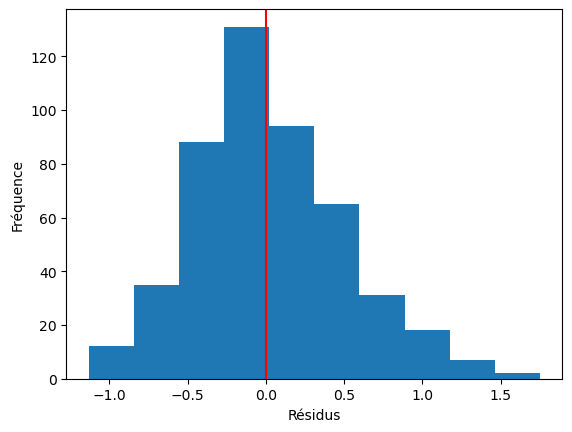

In [108]:
fig, ax = plt.subplots()
ax.hist(x=residus)
ax.axvline(x=0,color='r')
ax.set_xlabel('Résidus')
ax.set_ylabel('Fréquence')
plt.show()

In [109]:
test_shapiro_wilk = st.shapiro(residus)
test_shapiro_wilk

ShapiroResult(statistic=0.9847237467765808, pvalue=5.815914846607484e-05)

Avec une p-value inférieure à 0,01, nous pouvons rejeter l'hypothèse H0 et affirmer qu'il n'y a pas de normalité dans la distribution des résidus.

Pour finir, on se propose d'étudier la multicolinéarité des facteurs en utilisant la VIF (Variance Inflation Factor, ou facteur d'inflation de la variance en langue de Molière).

In [110]:
for column in X_train.columns:
    y_vif = X_train[column]
    X_vif = X_train.drop(columns=column)
    lr_vif = LinearRegression().fit(X_vif, y_vif)
    r2_vif = lr_vif.score(X_vif, y_vif)
    vif = 1 / (1 - r2_vif)
    print(f'{column} : \t{vif:.3f}')

diagonal : 	1.017
height_left : 	1.140
height_right : 	1.240
margin_up : 	1.416
length : 	1.571


Au regard de nos valeurs, nous observons qu'il y a effectivement de l'inflation de variance pour certaines variables (dans le cadre d'absence de colinéarité, le facteur observé est sensé être de 1), mais n'ayant pas de VIF supérieure à 2, notre modèle ne présente pas de problèmes de colinéarité significatif.

## Construction jeu de données final

In [111]:
test_billets_manquants = billets_manquants.drop(columns=["is_genuine","margin_low"])
lr.predict(test_billets_manquants)

array([4.31522292, 4.3966337 , 4.40042495, 4.35852857, 4.64481277,
       3.80831238, 4.18673122, 4.13649864, 4.09591559, 4.13707437,
       4.15138645, 3.78646908, 4.06428789, 4.30406108, 4.14713933,
       4.11011372, 4.42726507, 4.45084385, 4.33304877, 4.05973219,
       3.63597358, 4.39648837, 4.09755704, 4.28691243, 3.91265782,
       3.74969465, 4.22148818, 4.72633995, 4.13791154, 5.05498035,
       4.82529688, 5.05627246, 5.00035257, 4.76304106, 5.7007627 ,
       5.12463565, 5.11873192])

In [112]:
billets_manquants["margin_low"] = lr.predict(test_billets_manquants)
billets_manquants["margin_low"] = round(billets_manquants["margin_low"],2)
billets_manquants

C:\Users\jeffs\AppData\Local\Temp\ipykernel_15012\1607475270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billets_manquants["margin_low"] = lr.predict(test_billets_manquants)
C:\Users\jeffs\AppData\Local\Temp\ipykernel_15012\1607475270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billets_manquants["margin_low"] = round(billets_manquants["margin_low"],2)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.32,3.25,112.79
99,True,171.93,104.07,104.18,4.40,3.14,113.08
151,True,172.07,103.80,104.38,4.40,3.02,112.93
197,True,171.45,103.66,103.80,4.36,3.62,113.27
241,True,171.83,104.14,104.06,4.64,3.02,112.36
251,True,171.80,103.26,102.82,3.81,2.95,113.22
284,True,171.92,103.83,103.76,4.19,3.23,113.29
334,True,171.85,103.70,103.96,4.14,3.00,113.36
410,True,172.56,103.72,103.51,4.10,3.12,112.95
413,True,172.30,103.66,103.50,4.14,3.16,112.95


In [113]:
tableau_donnees = pd.concat([billets_complets,billets_manquants]).sort_index()
tableau_donnees

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


## Mise en place analyse en composantes principales

In [114]:
billets = tableau_donnees
billets["is_genuine"] = billets["is_genuine"].astype(int)
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [115]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int32  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 87.9 KB


In [116]:
noms_colonnes = billets.columns
noms_colonnes = noms_colonnes.drop('is_genuine')
noms_colonnes

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

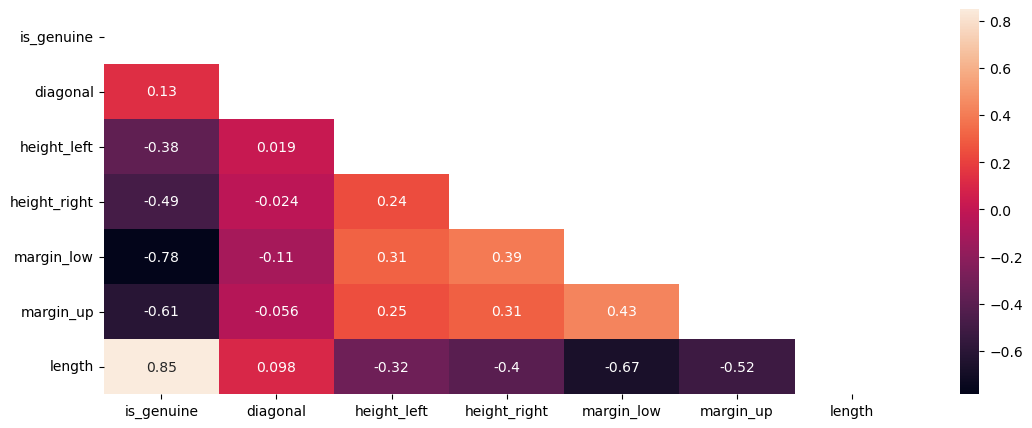

In [117]:
matrix_2 = billets.corr()
mask = np.triu(np.ones_like(matrix_2, dtype=np.bool_))
plt.figure(figsize=(13, 5))
sns.heatmap(matrix_2, mask=mask, annot=True)
plt.show()

In [118]:
matrice_billets = billets.drop(columns=["is_genuine"])
matrice_billets = matrice_billets.values
matrice_billets

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       ...,
       [171.8 , 104.01, 104.12,   5.51,   3.36, 111.95],
       [172.06, 104.28, 104.06,   5.17,   3.46, 112.25],
       [171.47, 104.15, 103.82,   4.63,   3.37, 112.07]])

In [119]:
scaler = StandardScaler()
matrice_billets_normalisee = scaler.fit_transform(matrice_billets)
matrice_billets_normalisee

array([[-0.48653957,  2.77412327,  3.16324041,  0.05549698, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08215065, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12652664, -0.91256208,
         0.55190114],
       ...,
       [-0.51931643, -0.06524991,  0.61346228,  1.55719185,  0.89984645,
        -0.83501554],
       [ 0.3328817 ,  0.83666863,  0.42914097,  1.04145826,  1.33137229,
        -0.4911519 ],
       [-1.6009525 ,  0.40241156, -0.30814427,  0.22235197,  0.94299904,
        -0.69747008]])

In [120]:
composants_analyse = 6
pca = PCA(n_components=composants_analyse)
pca.fit(matrice_billets_normalisee)

PCA(n_components=6)

In [121]:
pca.explained_variance_ratio_

array([0.43285994, 0.16958198, 0.1302481 , 0.11824025, 0.09599777,
       0.05307197])

In [122]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([43.29, 16.96, 13.02, 11.82,  9.6 ,  5.31])

In [123]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

In [124]:
x_list = range(1, composants_analyse+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

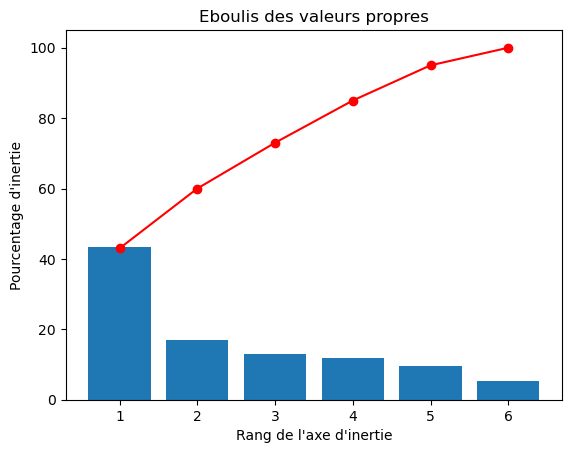

In [125]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [126]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5
0,-0.084914,0.330600,0.393619,0.507662,0.439428,-0.527010
1,0.941095,0.307915,0.108661,-0.073219,-0.004525,0.048379
2,-0.288018,0.884952,-0.164118,-0.108812,-0.270080,0.148956
3,-0.102060,-0.048981,0.866121,-0.088361,-0.445086,0.176380
4,-0.116959,0.101555,0.236973,-0.564282,0.711282,0.309055
5,0.008959,0.006308,0.000829,0.631550,0.172963,0.755716


In [127]:
pcs.columns = noms_colonnes
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,-0.08,0.33,0.39,0.51,0.44,-0.53
F2,0.94,0.31,0.11,-0.07,-0.00,0.05
F3,-0.29,0.88,-0.16,-0.11,-0.27,0.15
F4,-0.10,-0.05,0.87,-0.09,-0.45,0.18
F5,-0.12,0.10,0.24,-0.56,0.71,0.31
F6,0.01,0.01,0.00,0.63,0.17,0.76


In [128]:
pcs.T

,F1,F2,F3,F4,F5,F6
diagonal,-0.084914,0.941095,-0.288018,-0.102060,-0.116959,0.008959
height_left,0.330600,0.307915,0.884952,-0.048981,0.101555,0.006308
height_right,0.393619,0.108661,-0.164118,0.866121,0.236973,0.000829
margin_low,0.507662,-0.073219,-0.108812,-0.088361,-0.564282,0.631550
margin_up,0.439428,-0.004525,-0.270080,-0.445086,0.711282,0.172963
length,-0.527010,0.048379,0.148956,0.176380,0.309055,0.755716


In [129]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

<AxesSubplot:>

In [130]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    x,y=x_y
    fig, ax = plt.subplots(figsize=(10, 9))
    for i in range(0, pca.components_.shape[1]):
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
        plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  
    plt.axis('equal')
    plt.show(block=False)

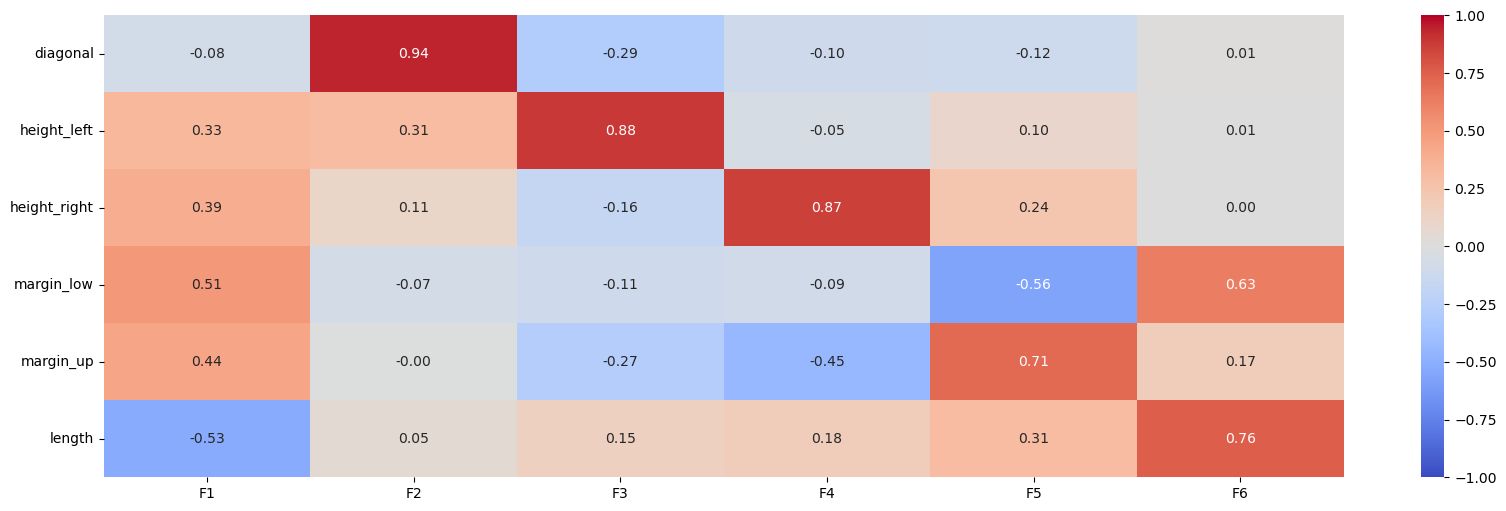

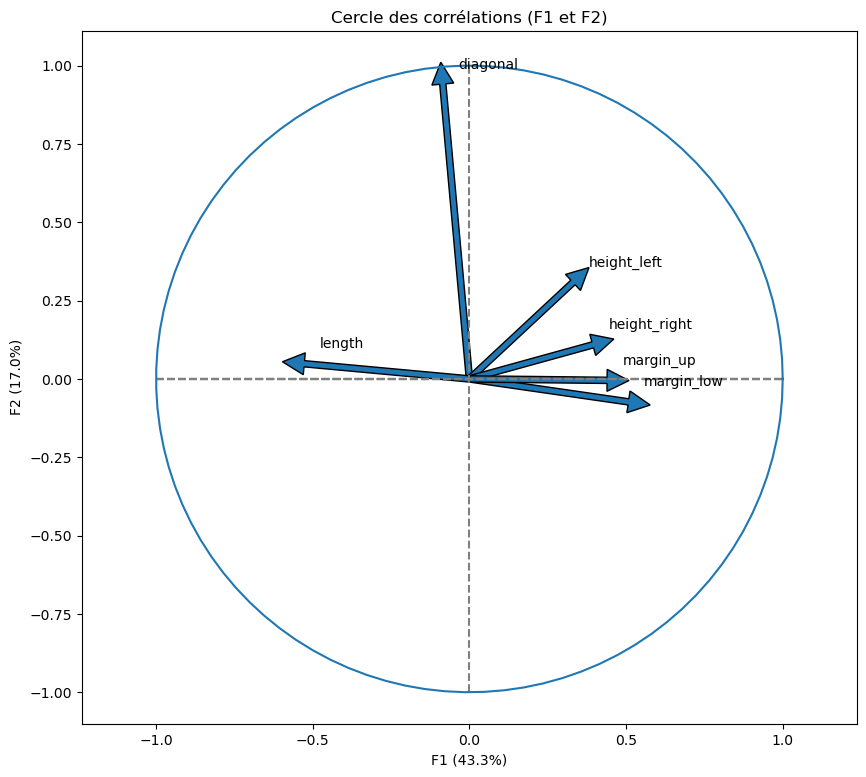

In [131]:
x_y = (0,1)
correlation_graph(pca, x_y,noms_colonnes)

In [132]:
X_proj = pca.transform(matrice_billets_normalisee)

In [133]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    X_ = np.array(X_projected)
    if not figsize: 
        figsize = (7,6)

    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e
 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    x, y = x_y
   
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    c = None if clusters is None else clusters
 
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

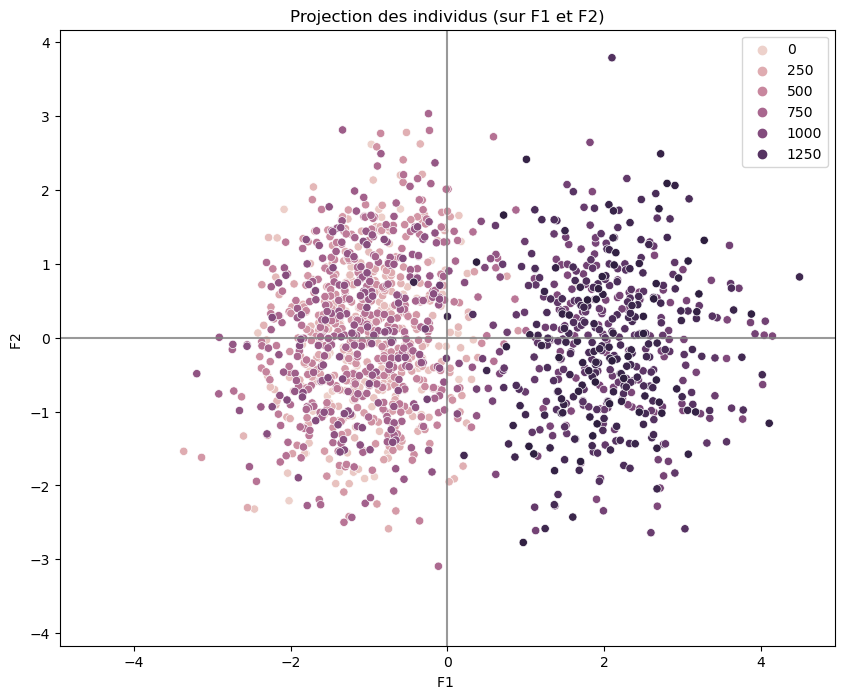

In [134]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=billets.index)

## Analyse K_Means

In [135]:
kmeans = KMeans(n_clusters=2,init='k-means++').fit(matrice_billets_normalisee)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.09600039 -0.28194592 -0.35241933 -0.55241176 -0.42692359  0.59324013]
 [-0.19432338  0.57071311  0.71336493  1.11818831  0.86417597 -1.20083284]]


In [136]:
kmeans.labels_
clusters_kmeans = pd.DataFrame(kmeans.labels_, columns=['Cluster KMeans'])
clusters_kmeans

,Cluster KMeans
0,1
1,0
2,0
3,0
4,0
...,...
1495,1
1496,1
1497,1
1498,1


In [137]:
clusters_kmeans["Cluster KMeans"] = clusters_kmeans["Cluster KMeans"].apply(lambda x:0 if x==1 else 1)
clusters_kmeans

,Cluster KMeans
0,0
1,1
2,1
3,1
4,1
...,...
1495,0
1496,0
1497,0
1498,0


In [138]:
tableau_clusters_kmeans = pd.merge(clusters_kmeans,billets,left_index=True,right_index=True)
tableau_clusters_kmeans.sort_values(by="Cluster KMeans")

,Cluster KMeans,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,1,171.81,104.86,104.95,4.52,2.89,112.83
1156,0,0,171.78,104.33,103.58,6.01,3.26,111.30
1157,0,0,172.09,103.70,104.27,5.53,3.51,112.20
1158,0,0,172.11,104.10,104.18,4.52,3.21,111.45
1159,0,0,171.47,104.33,104.03,5.25,3.01,111.68
...,...,...,...,...,...,...,...,...
835,1,1,172.15,104.08,104.10,4.34,2.78,113.33
836,1,1,172.52,103.98,103.74,4.66,3.19,113.44
837,1,1,172.18,103.60,103.76,3.59,2.75,112.24
824,1,1,172.10,104.09,103.83,4.49,3.25,113.37


In [139]:
clusters_kmeans.groupby("Cluster KMeans").value_counts()

Cluster KMeans
0     496
1    1004
dtype: int64

In [140]:
tableau_clusters_kmeans["is_genuine"] = tableau_clusters_kmeans["is_genuine"].astype(int)
tableau_clusters_kmeans["okay"] = tableau_clusters_kmeans["Cluster KMeans"] == tableau_clusters_kmeans["is_genuine"]
tableau_clusters_kmeans["okay"] = tableau_clusters_kmeans["okay"].astype(int)
tableau_clusters_kmeans

,Cluster KMeans,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,okay
0,0,1,171.81,104.86,104.95,4.52,2.89,112.83,0
1,1,1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,1,1,172.69,104.48,103.50,4.40,2.94,113.16,1
3,1,1,171.36,103.91,103.94,3.62,3.01,113.51,1
4,1,1,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...,...
1495,0,0,171.75,104.38,104.17,4.42,3.09,111.28,1
1496,0,0,172.19,104.63,104.44,5.27,3.37,110.97,1
1497,0,0,171.80,104.01,104.12,5.51,3.36,111.95,1
1498,0,0,172.06,104.28,104.06,5.17,3.46,112.25,1


In [141]:
matrice_confusion = metrics.confusion_matrix(tableau_clusters_kmeans["is_genuine"],tableau_clusters_kmeans["Cluster KMeans"],)
matrice_confusion

array([[486,  14],
       [ 10, 990]], dtype=int64)

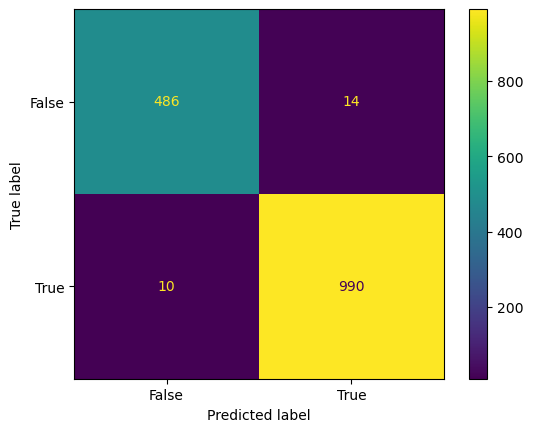

In [142]:
visuel_matrice = metrics.ConfusionMatrixDisplay(confusion_matrix = matrice_confusion, display_labels = [False, True])
visuel_matrice.plot()
plt.show()

In [143]:
metrics.precision_score(tableau_clusters_kmeans["is_genuine"],tableau_clusters_kmeans["Cluster KMeans"])

0.9860557768924303

In [144]:
print(metrics.classification_report(tableau_clusters_kmeans["is_genuine"],tableau_clusters_kmeans["Cluster KMeans"]))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       500
           1       0.99      0.99      0.99      1000

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



## Analyse par régression logistique

In [145]:
Y = billets["is_genuine"]
Y

0       1
1       1
2       1
3       1
4       1
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Name: is_genuine, Length: 1500, dtype: int32

In [146]:
X = billets.drop(columns=["is_genuine"])
X

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69,stratify=Y)

In [148]:
logistic = LogisticRegression()

In [149]:
logistic.fit(X_train, Y_train)

LogisticRegression()

In [150]:
logistic.score(X_test,Y_test)

0.9866666666666667

In [151]:
valeurs_predites_regression_logistique = logistic.predict(X_test)
valeurs_predites_regression_logistique

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [152]:
print(metrics.classification_report(Y_test,valeurs_predites_regression_logistique))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       100
           1       0.98      1.00      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



In [153]:
tableau_regression_logistique = pd.DataFrame(valeurs_predites_regression_logistique, columns=['Résultat régression logistique'])
tableau_regression_logistique.groupby("Résultat régression logistique").value_counts()

Résultat régression logistique
0     96
1    204
dtype: int64

In [154]:
tableau_regression_logistique

,Résultat régression logistique
0,1
1,0
2,1
3,0
4,1
...,...
295,0
296,1
297,1
298,0


In [155]:
tableau_regression_logistique = pd.DataFrame({"predict":valeurs_predites_regression_logistique,"reel":Y_test})
tableau_regression_logistique

,predict,reel
536,1,1
1486,0,0
561,1,1
1214,0,0
655,1,1
...,...,...
1225,0,0
945,1,1
392,1,1
1119,0,0


In [156]:
matrice_confusion_logistique = metrics.confusion_matrix(tableau_regression_logistique["reel"],tableau_regression_logistique["predict"])
matrice_confusion_logistique

array([[ 96,   4],
       [  0, 200]], dtype=int64)

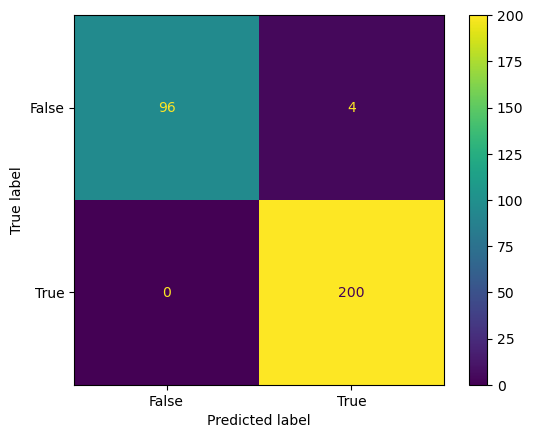

In [157]:
visuel_matrice_logistique = metrics.ConfusionMatrixDisplay(confusion_matrix = matrice_confusion_logistique, display_labels = [False, True])
visuel_matrice_logistique.plot()
plt.show()

In [158]:
joblib.dump(logistic,"modele_regression_logistique.opcl")

['modele_regression_logistique.opcl']

## Fonction de détection et tests

In [159]:
test = pd.read_csv('billets_production.csv')
test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 408.0+ bytes


In [161]:
logistic = joblib.load("modele_regression_logistique.opcl")

In [162]:
X_test = test.drop(columns=["id"])
X_test

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


In [165]:
test["estimation"] = logistic.predict_proba(X_test)[:,1]
test["prediction"] = logistic.predict(X_test).astype(int)
test

,diagonal,height_left,height_right,margin_low,margin_up,length,id,estimation,prediction
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.004447,0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.001090,0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.001415,0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.924261,1
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0.999670,1


In [166]:
print("Identification des billets:")
for i, k in zip(test["prediction"],test["id"]):
    if i == 1:
        print("Le billet","{}".format(k),"est vrai")
    else:
        print("Le billet","{}".format(k),"est faux")

Identification des billets:
Le billet A_1 est faux
Le billet A_2 est faux
Le billet A_3 est faux
Le billet A_4 est vrai
Le billet A_5 est vrai
